In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None) # Display all columns in DataFrame output
pd.set_option('display.max_rows', None) # Display all rows in DataFrame output
pd.set_option('display.float_format', '{:.6f}'.format) # Set the float format otherwise it will use the scientific way to display


In [210]:
df = pd.read_csv('data/listings.csv')

# Data Explore

In [211]:
# display the first 5 rows of the DataFrame to understand its structure
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,https://www.airbnb.com/rooms/197677,20211028222535,2021-10-29,Oshiage Holiday Apartment,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,Yoshimi & Marek,2011-08-13,Tokyo,Would love to travel all over the world and me...,within a day,100%,100%,f,https://a0.muscache.com/im/users/964081/profil...,https://a0.muscache.com/im/users/964081/profil...,Sumida District,1.000000,1.000000,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,NaN,Sumida Ku,NaN,35.717070,139.826080,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.000000,2.000000,"[""Shampoo"", ""Kitchen"", ""Essentials"", ""Microwav...","$11,000.00",3,365,3.000000,3.000000,365.000000,365.000000,3.000000,365.000000,NaN,t,28,58,88,363,2021-10-29,165,0,0,2012-09-25,2019-11-14,4.760000,4.730000,4.910000,4.830000,4.820000,4.510000,4.780000,M130003350,f,1,1,0,0,1.490000
1,776070,https://www.airbnb.com/rooms/776070,20211028222535,2021-10-29,Kero-kero house room 1,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,801494,https://www.airbnb.com/users/show/801494,Kei,2011-07-10,Japan,Love culture/foods/anime and to know about oth...,NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/user/ba6d4...,https://a0.muscache.com/im/pictures/user/ba6d4...,Kita District,1.000000,1.000000,"['email', 'phone', 'manual_online', 'reviews',...",t,t,"Kita-ku, Tokyo, Japan",Kita Ku,NaN,35.738440,139.769170,Private room in residential home,Private room,2,NaN,1 shared bath,1.000000,1.000000,"[""Air conditioning"", ""Shampoo"", ""Iron"", ""Ether...","$7,950.00",3,14,3.000000,3.000000,14.000000,14.000000,3.000000,14.000000,NaN,t,27,48,65,245,2021-10-29,228,0,0,2013-09-17,2020-01-18,4.970000,4.960000,4.920000,4.970000,4.970000,4.840000,4.910000,M130000243,t,1,0,1,0,2.310000
2,1196177,https://www.airbnb.com/rooms/1196177,20211028222535,2021-10-29,Stay with host Cozy private room Senju area,Ｓtay with host.We can help your travel.<br />B...,There are shopping mall near Senjuohashi stati...,https://a0.muscache.com/pictures/72890882/05ec...,5686404,https://www.airbnb.com/users/show/5686404,Yukiko,2013-03-30,"Adachi City, Tokyo, Japan",出身地 東京\r\n好きなこと 旅行､ﾃﾆｽ\r\n\r\nA host is the hu...,within a day,100%,NaN,t,https://a0.muscache.com/im/users/5686404/profi...,https://a0.muscache.com/im/users/5686404/profi...,Adachi District,2.000000,2.000000,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"足立区, 東京都, Japan",Adachi Ku,NaN,35.744750,139.797310,Private room in residential home,Private room,2,NaN,1 shared bath,1

In [212]:
df.shape

(10414, 74)

In [213]:
# There are too many columns, see columns available in this DataFrame
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [214]:
# only see columns that interest us
df_filtered = df[['id', 'name', 'host_id', 
       'host_name', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price',
       'minimum_nights','has_availability',
       'calendar_last_scraped', 'number_of_reviews',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'reviews_per_month']]
df_filtered.tail(3)

,id,name,host_id,host_name,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,has_availability,calendar_last_scraped,number_of_reviews,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
10411,52974109,★36間部屋新築ホテル割引有月額7万★東上野Artsy Inn セミダブルルーム,31734605,KS Home,NaN,Taito Ku,35.711891,139.783498,Entire serviced apartment,Entire home/apt,2,NaN,1.000000,1.000000,"$5,999.00",1,t,2021-10-29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
10412,52974300,★36間部屋新築ホテル割引有月額6万5★東上野 Artsy Inn シングルルーム,31734605,KS Home,NaN,Taito Ku,35.713552,139.783347,Entire serviced apartment,Entire home/apt,2,NaN,1.000000,1.000000,"$5,999.00",1,t,2021-10-29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
10413,53014539,"Entire140㎡ Big house,3floors,Shinjuku ,4mins t...",63598456,Spring,NaN,Shinjuku Ku,35.689559,139.717948,Entire residential home,Entire home/apt,16,NaN,6.000000,12.000000,"$25,714.00",1,t,2021-10-29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN


In [215]:
# get info about the DataFrame
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10414 entries, 0 to 10413
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           10414 non-null  int64  
 1   name                         10414 non-null  object 
 2   host_id                      10414 non-null  int64  
 3   host_name                    10386 non-null  object 
 4   neighbourhood                7756 non-null   object 
 5   neighbourhood_cleansed       10414 non-null  object 
 6   latitude                     10414 non-null  float64
 7   longitude                    10414 non-null  float64
 8   property_type                10414 non-null  object 
 9   room_type                    10414 non-null  object 
 10  accommodates                 10414 non-null  int64  
 11  bathrooms                    0 non-null      float64
 12  bedrooms                     9559 non-null   float64
 13  beds            

# Handle Irrelavant data

In [216]:
# columns where all values are the same (constant feature)
constant_features = [col for col in df_filtered.columns if df_filtered[col].nunique() == 1]
print('Constant Features: ', constant_features)

Constant Features:  []


In [217]:
# # There is not any constant features, thus nothing to drop at this moment. 
# # If there are any, can use the following to drop:
# df_no_constant_features = df_filtered.drop(columns=constant_features)

# Columns with mostly missing values (e.g. more than x% missing)
threshold = 20
print(f'Total records: {df_filtered.shape[0]}')
print('*' * 50)
for col in df_filtered.columns:
    missing_count = df_filtered[col].isnull().sum()
    missing_ratio = (missing_count / df_filtered.shape[0]) * 100
    if missing_ratio > threshold:
        print(f'Column: {col} has {missing_count} missing values ({missing_ratio:.2f}%) ')
        print('*' * 50)

Total records: 10414
**************************************************
Column: neighbourhood has 2658 missing values (25.52%) 
**************************************************
Column: bathrooms has 10414 missing values (100.00%) 
**************************************************
Column: last_review has 2118 missing values (20.34%) 
**************************************************
Column: review_scores_rating has 2118 missing values (20.34%) 
**************************************************
Column: review_scores_accuracy has 2129 missing values (20.44%) 
**************************************************
Column: review_scores_cleanliness has 2129 missing values (20.44%) 
**************************************************
Column: review_scores_checkin has 2129 missing values (20.44%) 
**************************************************
Column: review_scores_communication has 2129 missing values (20.44%) 
**************************************************
Column: review_scores_loca

In [218]:


# From above we can see that due to total count is 10414, columns such as neighbourhood has missing values that are more than 25%, 
# but neighbourhood_cleansed do not hold any missing values, it is possible that it gets clean by reading latitude and longitude values.
# There are also missing values on bedrooms, beds, we need to process the null values before analyzing. Most of the missing values are
# at the review score section (>20% missing ratio).
# For some reason, there is no bathroom info, so better ignore this column.
# Also remove neighbourhood column because neighbourhood_cleansed is better.

# df_filtered = df_filtered.drop(columns = ['bathrooms','neighbourhood'])
# Remove columns with more than x%
columns_to_drop = [col for col in df_filtered.columns if (df_filtered[col].isnull().sum() / df_filtered.shape[0]) * 100 > threshold]
df_filtered = df_filtered.drop(columns=columns_to_drop)

df_filtered.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,10414.000000,36115186.183503,10967576.988398,197677.000000,29699353.000000,38606899.000000,43718353.750000,53014539.000000
host_id,10414.000000,198893670.841751,117743424.394377,771694.000000,85022417.000000,210199913.000000,299176279.000000,428038217.000000
latitude,10414.000000,35.696715,0.041135,35.540970,35.685733,35.702615,35.719633,35.830640
longitude,10414.000000,139.736454,0.071668,139.095680,139.701300,139.732470,139.784980,139.911580
accommodates,10414.000000,4.182735,2.993691,0.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,9559.000000,1.440841,1.167330,1.000000,1.000000,1.000000,2.000000,40.000000
beds,9676.000000,2.670215,2.324449,1.000000,1.000000,2.000000,3.000000,56.000000
minimum_nights,10414.000000,3.818706,25.464387,1.000000,1.000000,1.000000,2.000000,999.000000
number_of_reviews,10414.000000,26.401575,43.849124,0.000000,1.000000,8.000000,33.000000,489.000000


In [ ]:
# From above there is an abnormal value! 
# max of minimum nights - 999 is clearly larger than 365 days in a year
# Later better pay more attention to this column and process them when need

# host name is not an important factor. Drop it
df_filtered =  df_filtered.drop(columns=['host_name'])


Start to process DataFrame slightly - missing values

In [220]:
# Display the DataFrame having missing values
df_missing_data = df_filtered[df_filtered.isnull().any(axis=1)]

# df_missing_data

In [221]:
df_missing_data.tail()

,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,has_availability,calendar_last_scraped,number_of_reviews,instant_bookable
10389,52822268,人気の新宿・浅築・ブリティッシュブルー・２人・高田馬場駅から徒歩７分の好立地・高速Wifi・...,402335966,Shinjuku Ku,35.715450,139.699200,Entire rental unit,Entire home/apt,2,NaN,1.000000,"$10,000.00",1,t,2021-10-29,0,t
10390,52822308,人気の新宿・浅築・モダンな和風グリーントーン・高田馬場駅から徒歩７分の好立地・高速Wifi・...,402335966,Shinjuku Ku,35.715462,139.699188,Entire rental unit,Entire home/apt,2,NaN,1.000000,"$10,000.00",1,t,2021-10-29,0,t
10391,52822342,人気の新宿・浅築・モダンな和風 赤いトーン・高田馬場駅から徒歩７分の好立地・高速Wifi・長期割引,402335966,Shinjuku Ku,35.715462,139.699188,Entire rental unit,Entire home/apt,2,NaN,1.000000,"$10,000.00",1,t,2021-10-29,0,t
10399,52908934,long-term stays OK@JROtsukasta.5mins walk#3ppl,197405131,Toshima Ku,35.731130,139.734780,Entire rental unit,Entire home/apt,3,1.000000,NaN,"$4,240.00",1,t,2021-10-29,0,t
10400,52909995,JROtsuka 5min#Minimalist House#FreeWifi&Max3(402),197405131,Toshima Ku,35.729030,139.734570,Entire rental unit,Entire home/apt,3,1.000000,NaN,"$6,320.00",1,t,2021-10-29,0,t


In [222]:
# Investigate more on the missing values
df_filtered.isnull().sum()

id                          0
name                        0
host_id                     0
neighbourhood_cleansed      0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bedrooms                  855
beds                      738
price                       0
minimum_nights              0
has_availability            0
calendar_last_scraped       0
number_of_reviews           0
instant_bookable            0
dtype: int64

In [223]:

# process the missing data to fill them with 0
df_filtered.fillna({'bedrooms':0, 'beds':0},inplace=True)

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10414 entries, 0 to 10413
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10414 non-null  int64  
 1   name                    10414 non-null  object 
 2   host_id                 10414 non-null  int64  
 3   neighbourhood_cleansed  10414 non-null  object 
 4   latitude                10414 non-null  float64
 5   longitude               10414 non-null  float64
 6   property_type           10414 non-null  object 
 7   room_type               10414 non-null  object 
 8   accommodates            10414 non-null  int64  
 9   bedrooms                10414 non-null  float64
 10  beds                    10414 non-null  float64
 11  price                   10414 non-null  object 
 12  minimum_nights          10414 non-null  int64  
 13  has_availability        10414 non-null  object 
 14  calendar_last_scraped   10414 non-null

Start to handle abnormal data

<Axes: >

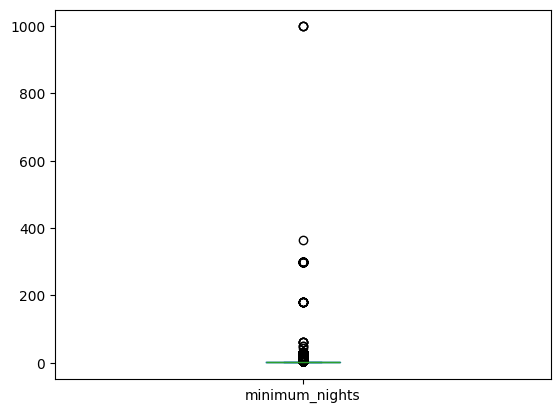

In [224]:
# Now there is no missing data, start to have a look on the abnormal value at minimum_nights column
# Can use a graph to investigate on values in this column
df_filtered['minimum_nights'].plot.box()

<Axes: >

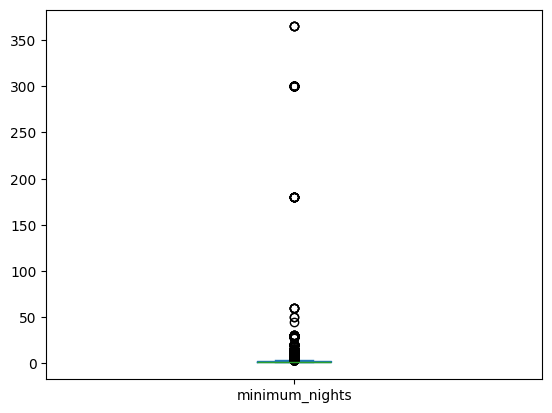

In [225]:
# look like not much values are abnormal, we can process this to 365 days instead
df_filtered.loc[df_filtered['minimum_nights'] > 365, 'minimum_nights'] = 365

df_filtered['minimum_nights'].plot.box()

In [226]:
# Looks better now
df_filtered.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10414.000000,36115186.183503,10967576.988398,197677.000000,29699353.000000,38606899.000000,43718353.750000,53014539.000000
host_id,10414.000000,198893670.841751,117743424.394377,771694.000000,85022417.000000,210199913.000000,299176279.000000,428038217.000000
latitude,10414.000000,35.696715,0.041135,35.540970,35.685733,35.702615,35.719633,35.830640
longitude,10414.000000,139.736454,0.071668,139.095680,139.701300,139.732470,139.784980,139.911580
accommodates,10414.000000,4.182735,2.993691,0.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,10414.000000,1.322547,1.186270,0.000000,1.000000,1.000000,1.000000,40.000000
beds,10414.000000,2.480987,2.343000,0.000000,1.000000,2.000000,3.000000,56.000000
minimum_nights,10414.000000,3.636067,20.016330,1.000000,1.000000,1.000000,2.000000,365.000000
number_of_reviews,10414.000000,26.401575,43.849124,0.000000,1.000000,8.000000,33.000000,489.000000


Start to see whether if need to handle duplicate

In [227]:
# Investigate on duplicated values
for col in df_filtered.columns:
    duplicated_count = df_filtered[col].duplicated().sum()
    print(f'Column: {col}')
    print(f'Duplicate Count: {duplicated_count}')
    print('*' * 50)

# # If need to identify duplicate records by multiple columns, use the following.
# # Do not apply in this case that we are analyzing
# duplicate_multi_cols = df_filtered[
#     df_filtered.duplicated(
#         subset = ['bedrooms','beds'],
#         keep=False
#     )
# ]

# duplicate_multi_cols.shape
# duplicate_multi_cols.sort_values('bedrooms').head(5)

# # Remove duplicate rows from the DataFrame considering all columns
# remove_duplicates_all_cols = df_filtered.drop_duplicates()

# # Remove duplicates based on columns
# remove_duplicate_multi_cols = df_filtered.drop_duplicates(
#     subset=['bedrooms','beds'],
#     keep='first' # Keep the first record, otherwise all duplicates will be gone. Can define first or last here
# )
# remove_duplicate_multi_cols.shape

Column: id
Duplicate Count: 0
**************************************************
Column: name
Duplicate Count: 800
**************************************************
Column: host_id
Duplicate Count: 7809
**************************************************
Column: neighbourhood_cleansed
Duplicate Count: 10365
**************************************************
Column: latitude
Duplicate Count: 4033
**************************************************
Column: longitude
Duplicate Count: 3196
**************************************************
Column: property_type
Duplicate Count: 10348
**************************************************
Column: room_type
Duplicate Count: 10410
**************************************************
Column: accommodates
Duplicate Count: 10397
**************************************************
Column: bedrooms
Duplicate Count: 10394
**************************************************
Column: beds
Duplicate Count: 10388
*************************************************

In [228]:
# For this dataset that we are dealing with, check whether if there are any duplicate of all columns
duplicate_rows = df_filtered[df_filtered.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [id, name, host_id, neighbourhood_cleansed, latitude, longitude, property_type, room_type, accommodates, bedrooms, beds, price, minimum_nights, has_availability, calendar_last_scraped, number_of_reviews, instant_bookable]
Index: []


In [229]:
# So there're no duplicate of all columns which is good.